Generate 100 observations from a $N(0,1)$ distribution.
Compute a 95 percent confidence band for the CDF $F$.
Repeat this 1000 times and see how often the confidence band contains the true distribution.
Repeat using data from a Cauchy distribution.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import cauchy
from scipy.stats import norm

In [3]:
def compute_empirical_cdf(X, x):
    return [np.mean(X < xi) for xi in x]

In [4]:
def compute_empirical_cdf_band(X, x, alpha=0.05):
    
    empirical_cdf = compute_empirical_cdf(X, x)
    
    n = len(X)
    epsilon = np.sqrt(np.log(2/alpha)/(2*n))

    cdf_lowerbound = [max(empirical_cdf[i] - epsilon, 0) for i, xi in enumerate(x)]
    cdf_upperbound = [min(empirical_cdf[i] + epsilon, 1) for i, xi in enumerate(x)]
    
    return empirical_cdf, cdf_lowerbound, cdf_upperbound

In [5]:
def compute_coverage_one_trial(dist, n=100, alpha=0.05, x=np.linspace(-5, 5, 1000)):
    
    X = dist.rvs(size=n)
    
    empirical_cdf, cdf_lowerbound, cdf_upperbound = compute_empirical_cdf_band(X, x, alpha=alpha)
    true_cdf = dist.cdf(x)
    
    return (
        sum(
            1 for i, xi in enumerate(x)
            if cdf_lowerbound[i] >= true_cdf[i] or true_cdf[i] >= cdf_upperbound[i]
        ) == 0
    )

In [6]:
def compute_coverage(dist, n=100, trials=1000, alpha=0.05, x=np.linspace(-5, 5, 1000)):
    return sum(compute_coverage_one_trial(dist) for _ in range(trials)) / trials

In [7]:
print(
    f"The uniform converage of the confidence band for the Normal distribution is {compute_coverage(norm)*100:.0f}%"
)

The uniform converage of the confidence band for the Normal distribution is 96%


In [8]:
print(
    f"The uniform converage of the confidence band for the Cauchy distribution is {compute_coverage(cauchy)*100:.0f}%"
)

The uniform converage of the confidence band for the Cauchy distribution is 95%


In [9]:
def plot_empirical_cdf_band(
    dist,
    n,
    alpha=0.05,
    plot_empirical_cdf=False,
    plot_band=True,
    plot_true_dist=True
):
    
    X = dist.rvs(size=n)
    x = np.linspace(-5, 5, 1000)
    
    empirical_cdf, cdf_lowerbound, cdf_upperbound = compute_empirical_cdf_band(X, x, alpha=alpha)
    
    if plot_band:
        plt.plot(x, cdf_lowerbound)
        plt.plot(x, cdf_upperbound)
    if plot_true_dist:
        true_cdf = dist.cdf(x)
        plt.plot(x, true_cdf)
    if plot_empirical_cdf:
        plt.plot(x, empirical_cdf)
        
    plt.xlabel('x')
    plt.ylabel('F_n (x)')
    plt.show()

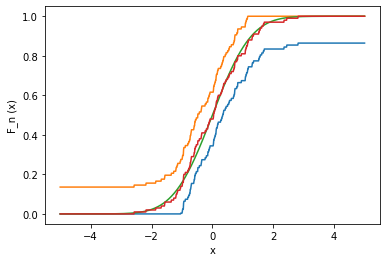

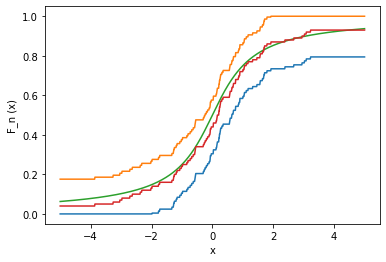

In [12]:
plot_empirical_cdf_band(norm, n=100, plot_empirical_cdf=True, plot_band=True)
plot_empirical_cdf_band(cauchy, n=100, plot_empirical_cdf=True, plot_band=True)